# Handling Missing values
Ways to handle missing values:
1. Delete the Record Missing Value
2. Create a Separate model to handle Missing Value
3. Statistical methods mean, median or mode

1. Deleting Record apply when our dataset is very large
2. Creating a separate model
    a) Take more time
    b) More computation required
    c) Take missing values a test dataset and try to predict that value by considering other variable as idependent variable
3. Replace missing values with mean, median, mode

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [7]:
dataset = pd.read_csv("https://gist.githubusercontent.com/aficionado/7743748/raw/c77d6f56b5689a74d4c4a9a1d4b6dfbe6c4e247a/titanic_train.csv")

In [28]:
dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

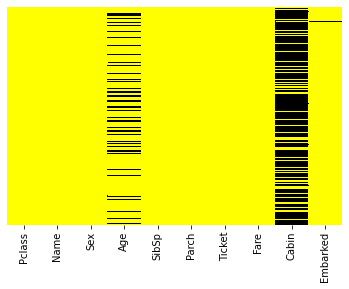

In [34]:
sb.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap=['yellow', 'black'])

In [30]:
dataset.Cabin.isnull().sum()

687

<AxesSubplot:xlabel='Pclass', ylabel='count'>

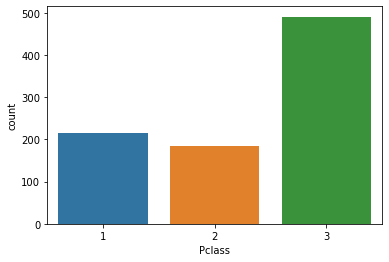

In [35]:
sb.countplot(data=dataset, x='Pclass')

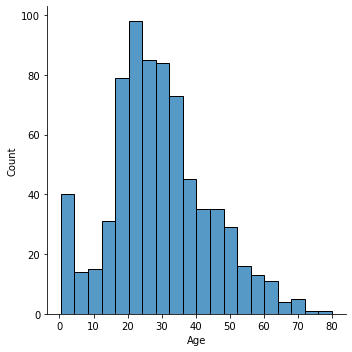

In [40]:
sb.displot(dataset['Age'].dropna())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

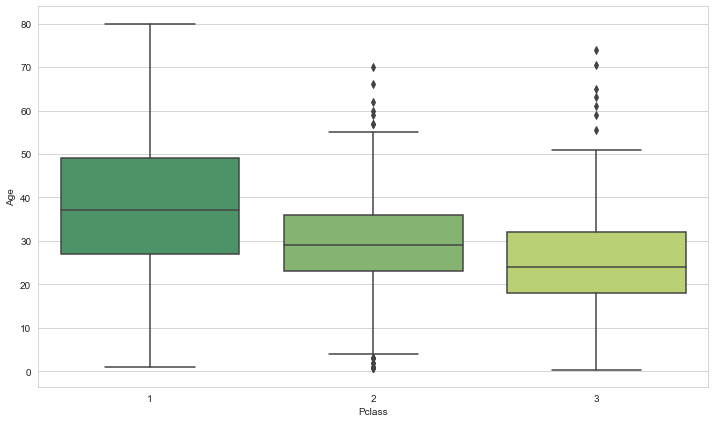

In [49]:
plt.figure(figsize=(12,7))
sb.set_style('whitegrid')
sb.boxplot(data=dataset, y = 'Age', x='Pclass', palette='summer')

# For Pclass
   ### 1 :  Mean Age is 37
   ### 2 :  Mean Age is 29
   ### 3 :  Mean Age is 24

In [53]:
def processAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else : return 24
    else :
        return Age

In [54]:
dataset['Age'] = dataset[['Age','Pclass']].apply(processAge, axis=1)

In [55]:
dataset['Age'].isnull().sum()

0

<AxesSubplot:>

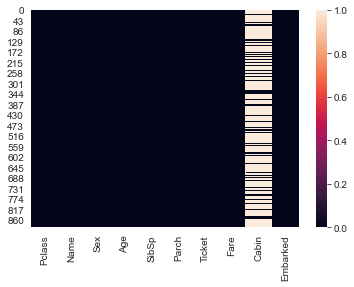

In [58]:
sb.heatmap(data=dataset.isnull())

In [61]:
dataset.drop(columns=['Cabin'], inplace=True)

In [62]:
dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

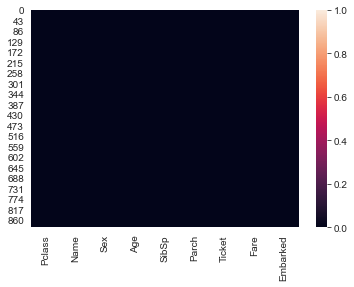

In [63]:
sb.heatmap(data=dataset.isnull())

### Filling Na value with
1. Forward/ Backward Fill
2. Interpolation
3. dropna
4. Replacing values